In [1]:
import pandas as pd
import os
import glob

# Initialize lists to store DataFrames and loaded file names
eeg_dfs = []
hybrid_dfs = []
eeg_loaded_files = []
hybrid_loaded_files = []

# Directory where the uploaded files are stored
data_dir = 'C:\\Users\\arkos\\Documents\\Project_Python_Code\\new-repo\\profile\\combo data'

# Use glob to find all csv files in the directory
all_csv_files = glob.glob(os.path.join(data_dir, '*.csv'))

# Load EEG files and concatenate
for file_path in all_csv_files:
    if 'eeg_data' in os.path.basename(file_path):
        print(f"Loading EEG file: {os.path.basename(file_path)}")
        df = pd.read_csv(file_path)
        eeg_dfs.append(df)
        eeg_loaded_files.append(os.path.basename(file_path))

# Concatenate EEG DataFrames
eeg_concatenated_df = pd.concat(eeg_dfs, ignore_index=True)

# Load Hybrid files and concatenate
for file_path in all_csv_files:
    if 'hybrid_data' in os.path.basename(file_path):
        print(f"Loading Hybrid file: {os.path.basename(file_path)}")
        df = pd.read_csv(file_path)
        hybrid_dfs.append(df)
        hybrid_loaded_files.append(os.path.basename(file_path))

# Concatenate Hybrid DataFrames
hybrid_concatenated_df = pd.concat(hybrid_dfs, ignore_index=True)

# Show the first few rows of each concatenated DataFrame to understand their structure
eeg_concatenated_df.head(), hybrid_concatenated_df.head()

# Print the list of loaded files for EEG and Hybrid
print("Loaded EEG files:", eeg_loaded_files)
print("Loaded Hybrid files:", hybrid_loaded_files)


Loading EEG file: eeg_data_20230705142209.csv
Loading EEG file: eeg_data_20230705142827.csv
Loading EEG file: eeg_data_20230705143714.csv
Loading EEG file: eeg_data_20230705150601.csv
Loading EEG file: eeg_data_20230705151559.csv
Loading EEG file: eeg_data_20230705151932.csv
Loading EEG file: eeg_data_20230705152259.csv
Loading EEG file: eeg_data_20230728150927.csv
Loading EEG file: eeg_data_20230728151256.csv
Loading EEG file: eeg_data_20230728151642.csv
Loading EEG file: eeg_data_20230728152219.csv
Loading EEG file: eeg_data_20230728160419.csv
Loading EEG file: eeg_data_20230728160845.csv
Loading Hybrid file: hybrid_data_20230804164650.csv
Loading Hybrid file: hybrid_data_20230804165122.csv
Loading Hybrid file: hybrid_data_20230804165602.csv
Loading Hybrid file: hybrid_data_20230804170033.csv
Loading Hybrid file: hybrid_data_20230804170505.csv
Loading Hybrid file: hybrid_data_20230804171948.csv
Loading Hybrid file: hybrid_data_20230804172416.csv
Loading Hybrid file: hybrid_data_20230

In [2]:
from scipy.stats import skew, kurtosis

# Define channel combinations
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 
                'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 
                'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']

parietal_occipital_channels = ['P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4']

# Function to calculate mathematical characteristics
def calculate_characteristics(df, channels):
    characteristics = {
        'Mean': df[channels].mean(),
        'Standard Deviation': df[channels].std(),
        'Skewness': df[channels].apply(skew),
        'Kurtosis': df[channels].apply(kurtosis)
    }
    return characteristics

# Calculate characteristics for EEG channels
eeg_characteristics = calculate_characteristics(eeg_concatenated_df, eeg_channels)

# Calculate characteristics for Parietal and Occipital channels
parietal_occipital_characteristics = calculate_characteristics(eeg_concatenated_df, parietal_occipital_channels)

eeg_characteristics, parietal_occipital_characteristics


({'Mean': Cz        3.454583
  Fz      -10.203869
  Fp1    -296.471200
  F7       -9.475518
  F3       -1.758322
  FC1      -2.322715
  C3       -1.595874
  FC5      -1.778262
  FT9      -2.795214
  T7       -2.051521
  CP5      -1.369277
  CP1       2.789091
  P3       -3.250724
  P7       -1.670500
  PO9      -2.849635
  O1        2.395217
  Pz       -1.993815
  Oz       -3.862057
  O2       -2.518701
  PO10     -2.983425
  P8       -3.465544
  P4        0.411333
  CP2      -2.416158
  CP6      -1.956642
  T8       -2.754402
  FT10     -3.799409
  FC6      -2.310259
  C4       -1.630654
  FC2      -0.583067
  F4       -0.727809
  F8       -8.605073
  Fp2    -190.045484
  dtype: float64,
  'Standard Deviation': Cz       95.786007
  Fz      123.625663
  Fp1     289.983742
  F7      130.600741
  F3      100.382690
  FC1      72.300746
  C3       98.876242
  FC5      95.408547
  FT9      94.512211
  T7       83.118930
  CP5      72.501609
  CP1      83.596940
  P3       69.457850
  P7   

In [3]:
import numpy as np
from scipy.stats import entropy

# Function to calculate zero-crossing rate
def zero_crossing_rate(series):
    zero_crossings = np.where(np.diff(np.sign(series)))[0]
    return len(zero_crossings) / len(series)

# Function to calculate Signal-to-Noise Ratio (SNR)
def snr(mean, std_dev):
    return mean / std_dev if std_dev != 0 else np.nan

# Function to calculate all mathematical characteristics
def calculate_all_characteristics(df, channels):
    characteristics = {
        'Mean': df[channels].mean(),
        'Standard Deviation': df[channels].std(),
        'Variance': df[channels].var(),
        'Median': df[channels].median(),
        'Max': df[channels].max(),
        'Min': df[channels].min(),
        'Range': df[channels].max() - df[channels].min(),
        'Skewness': df[channels].apply(skew),
        'Kurtosis': df[channels].apply(kurtosis),
        'Zero-Crossing Rate': df[channels].apply(zero_crossing_rate),
        'Entropy': df[channels].apply(lambda x: entropy(pd.Series(x).value_counts(normalize=True), base=2)),
        'SNR': df[channels].mean() / df[channels].std()
    }
    return characteristics

# Calculate characteristics for EEG channels
eeg_all_characteristics = calculate_all_characteristics(eeg_concatenated_df, eeg_channels)

# Calculate characteristics for Parietal and Occipital channels
parietal_occipital_all_characteristics = calculate_all_characteristics(eeg_concatenated_df, parietal_occipital_channels)

# Showing a subset for brevity
{key: eeg_all_characteristics[key].head() for key in eeg_all_characteristics.keys()}, \
{key: parietal_occipital_all_characteristics[key].head() for key in parietal_occipital_all_characteristics.keys()}


({'Mean': Cz       3.454583
  Fz     -10.203869
  Fp1   -296.471200
  F7      -9.475518
  F3      -1.758322
  dtype: float64,
  'Standard Deviation': Cz      95.786007
  Fz     123.625663
  Fp1    289.983742
  F7     130.600741
  F3     100.382690
  dtype: float64,
  'Variance': Cz      9174.959102
  Fz     15283.304522
  Fp1    84090.570679
  F7     17056.553487
  F3     10076.684409
  dtype: float64,
  'Median': Cz      -2.3690
  Fz      -3.6675
  Fp1   -239.9940
  F7      -7.6580
  F3      -4.4110
  dtype: float64,
  'Max': Cz     1426.508
  Fz     1125.084
  Fp1     408.190
  F7     1571.008
  F3      799.953
  dtype: float64,
  'Min': Cz     -796.223
  Fz    -2363.118
  Fp1   -1531.010
  F7    -1113.785
  F3    -1034.381
  dtype: float64,
  'Range': Cz     2222.731
  Fz     3488.202
  Fp1    1939.200
  F7     2684.793
  F3     1834.334
  dtype: float64,
  'Skewness': Cz     5.074483
  Fz    -9.287887
  Fp1   -0.710994
  F7    -0.746165
  F3    -0.378646
  dtype: float64,
  'Kurtos

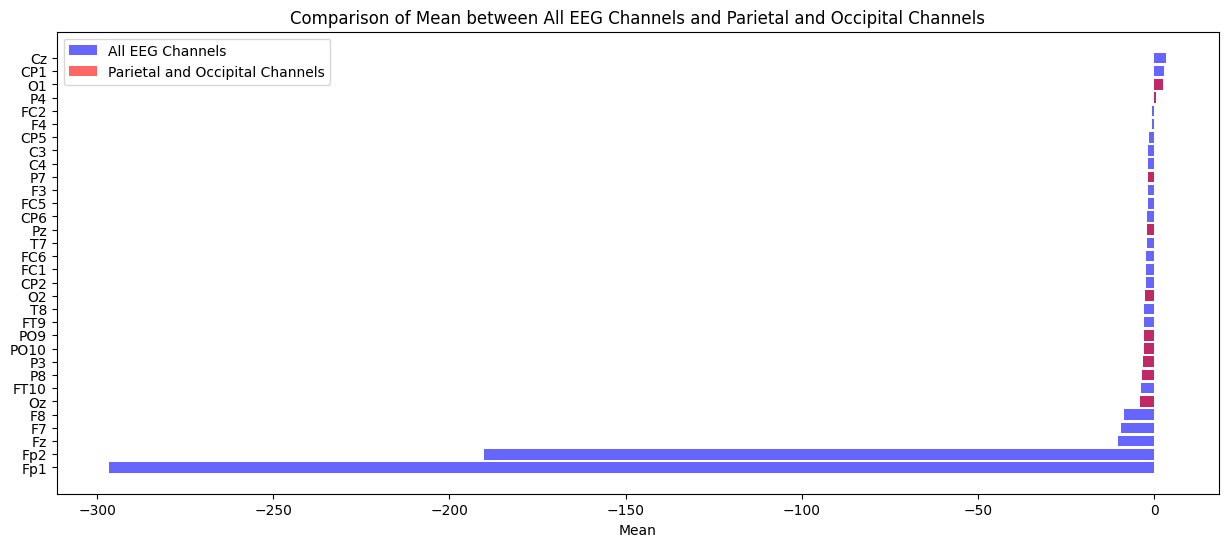

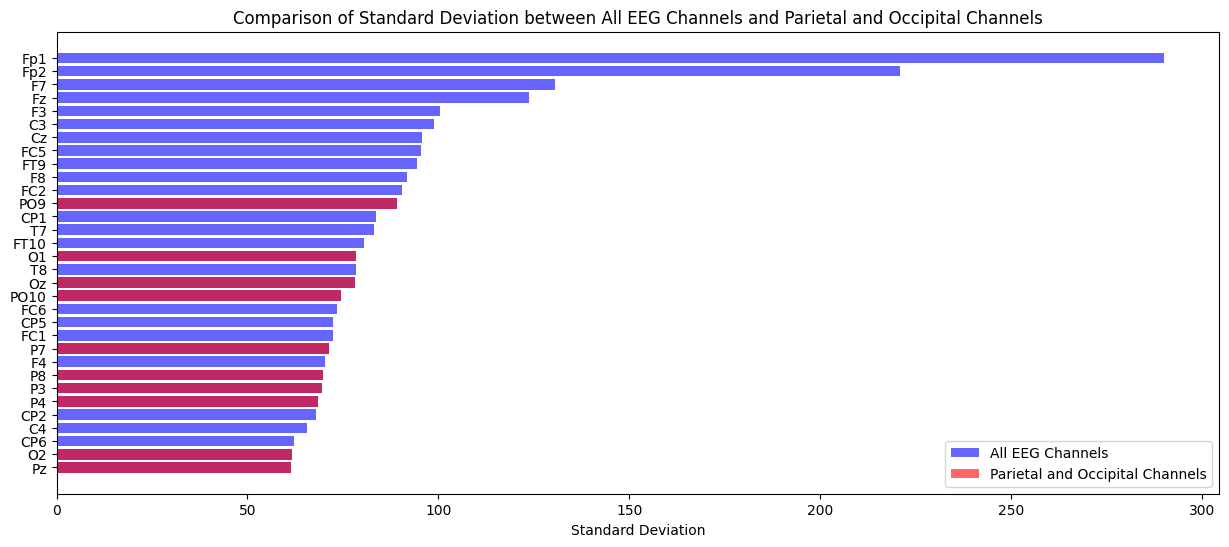

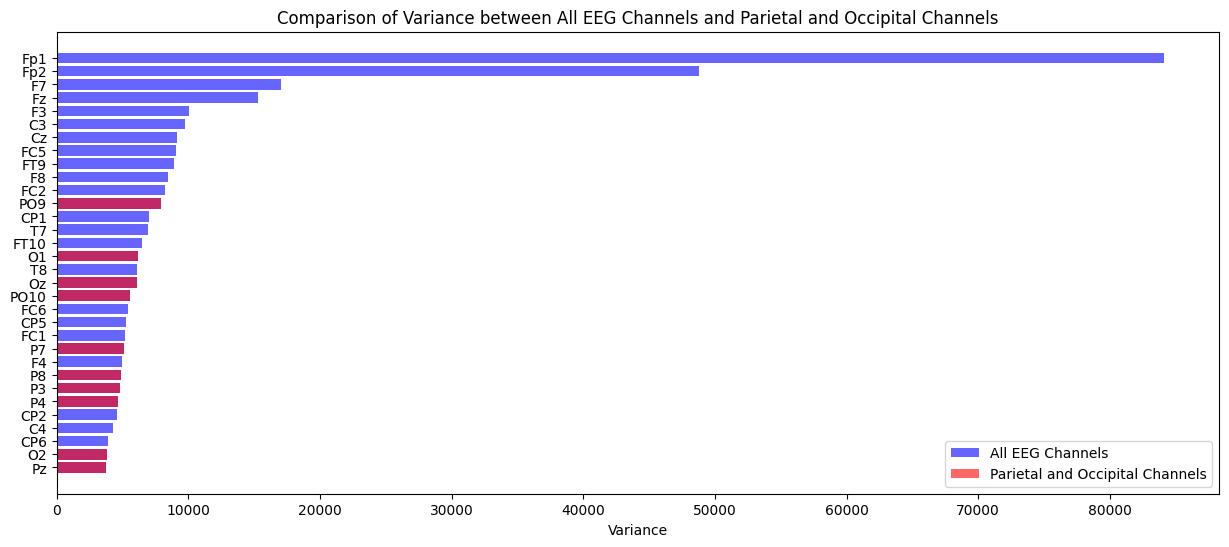

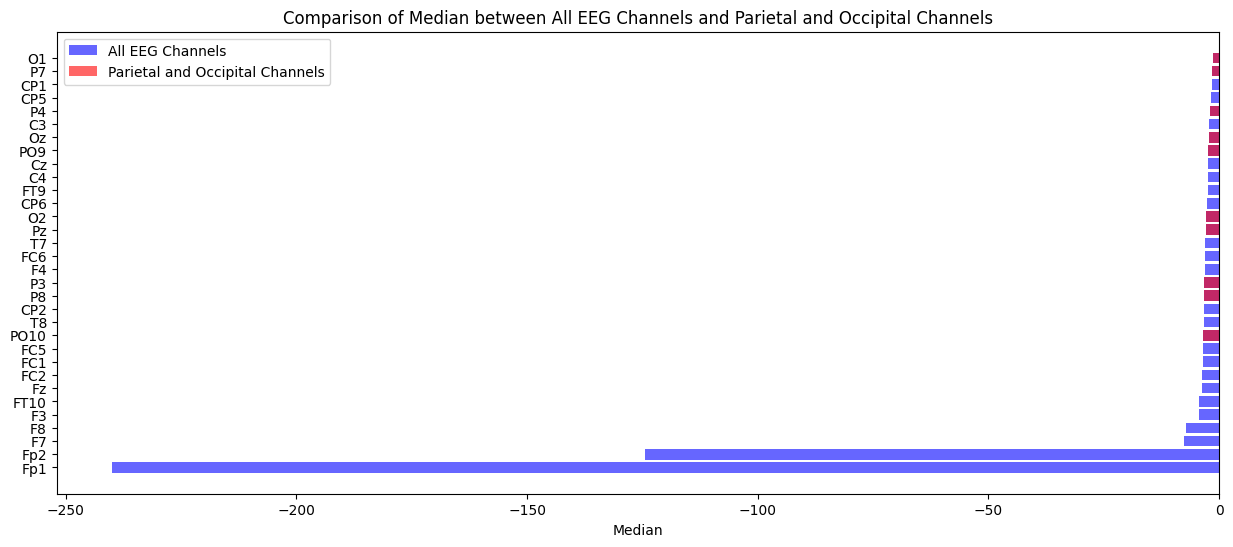

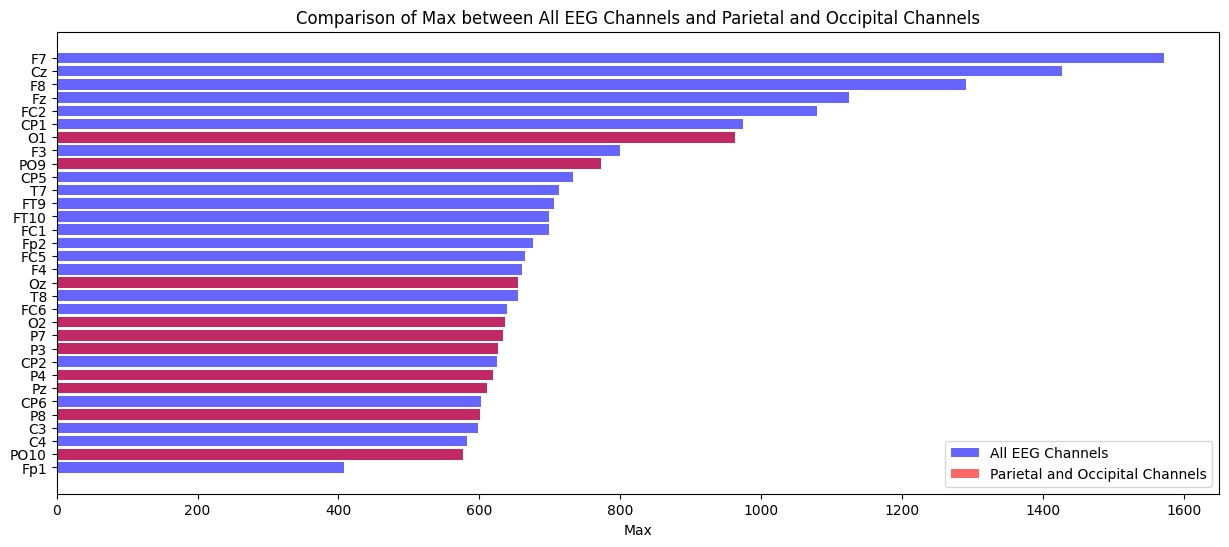

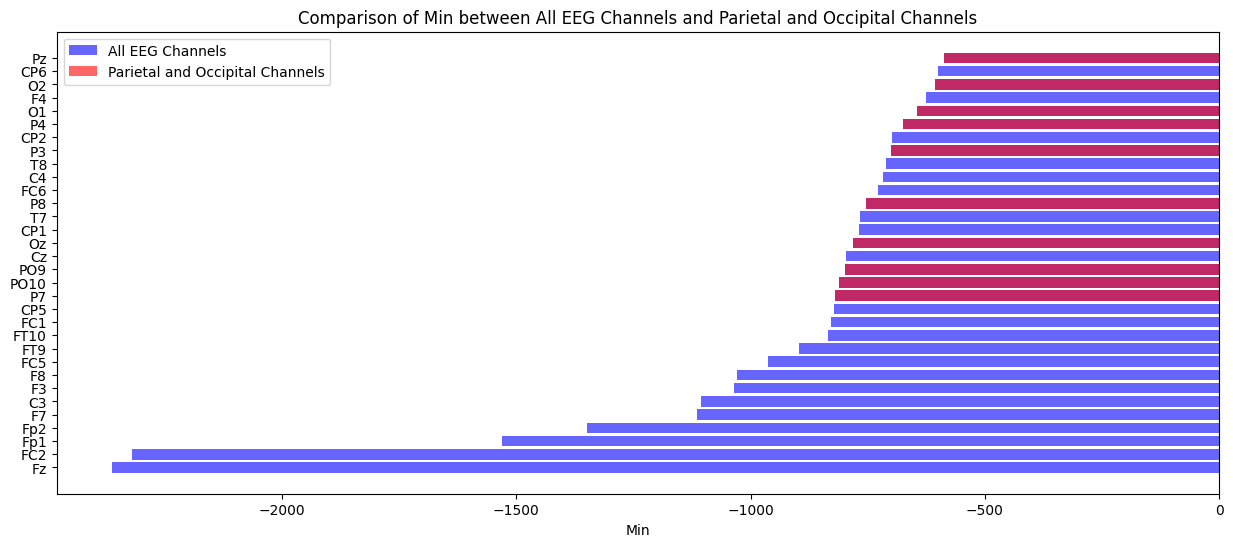

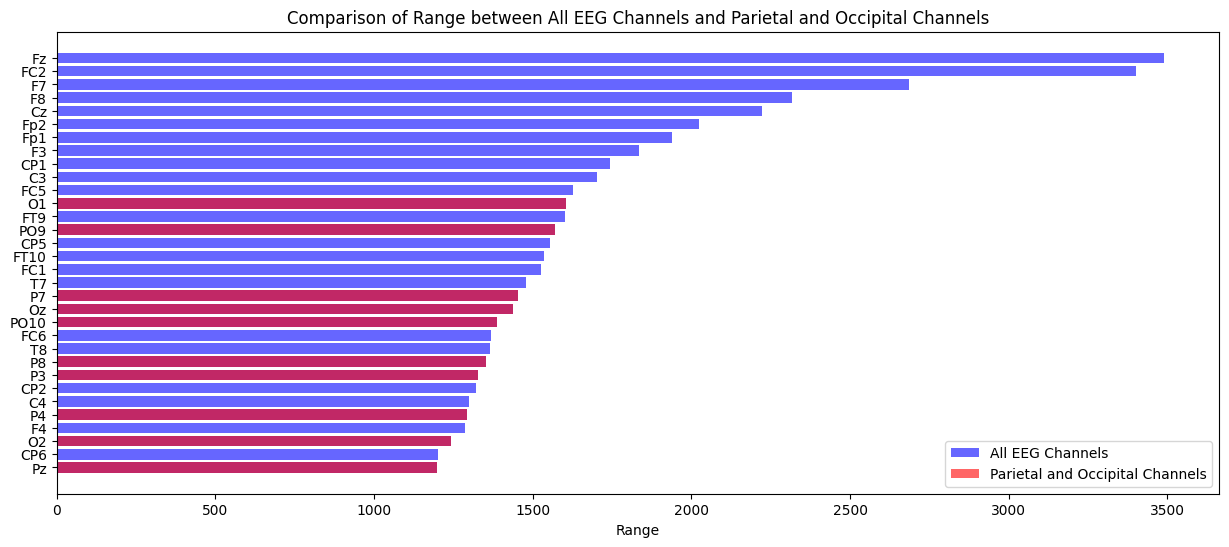

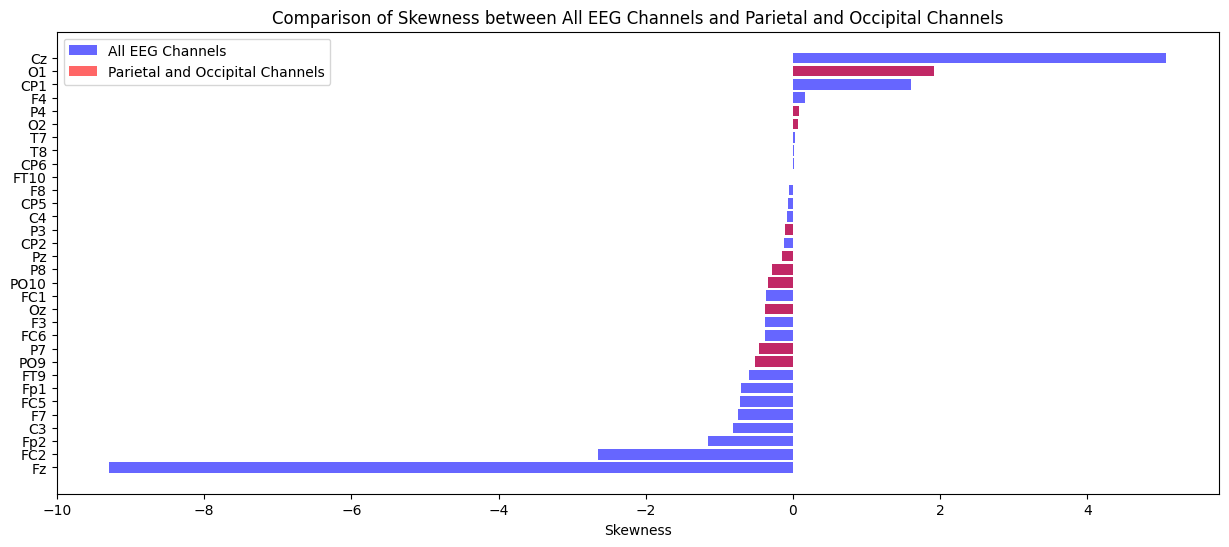

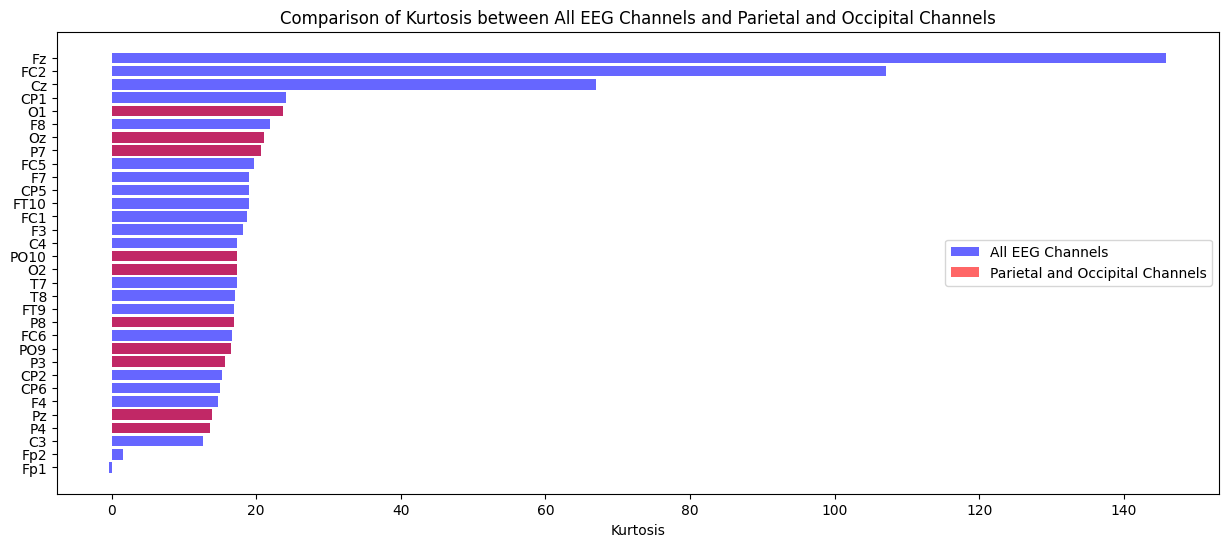

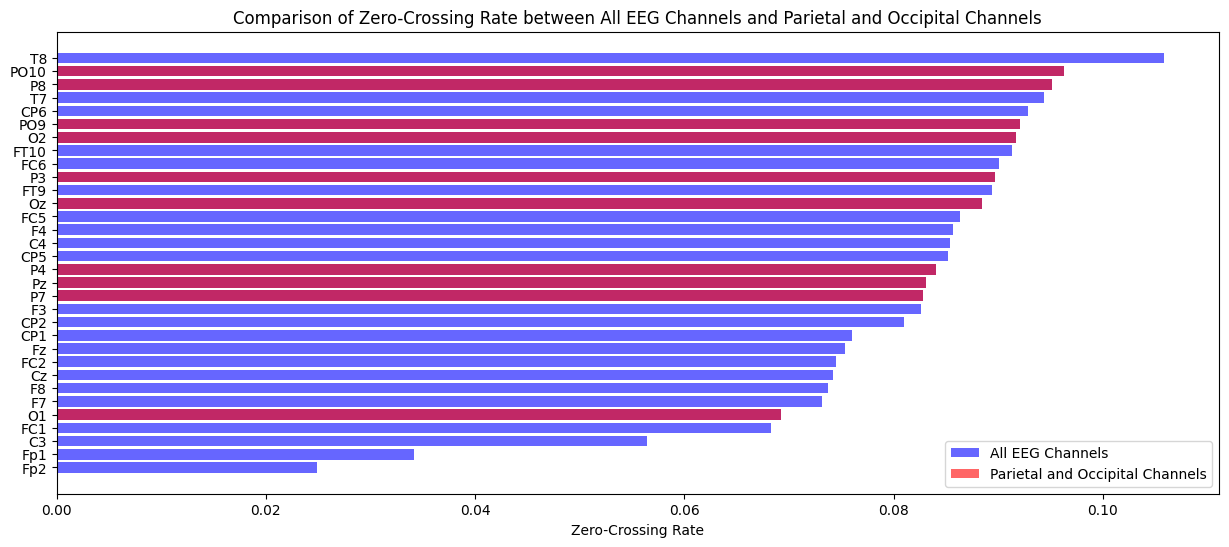

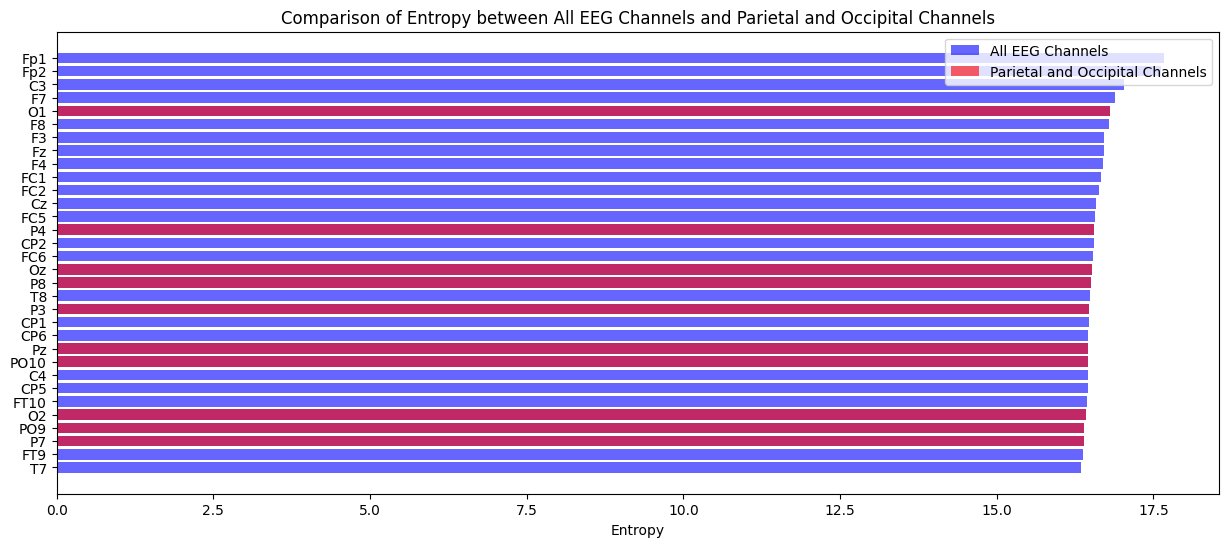

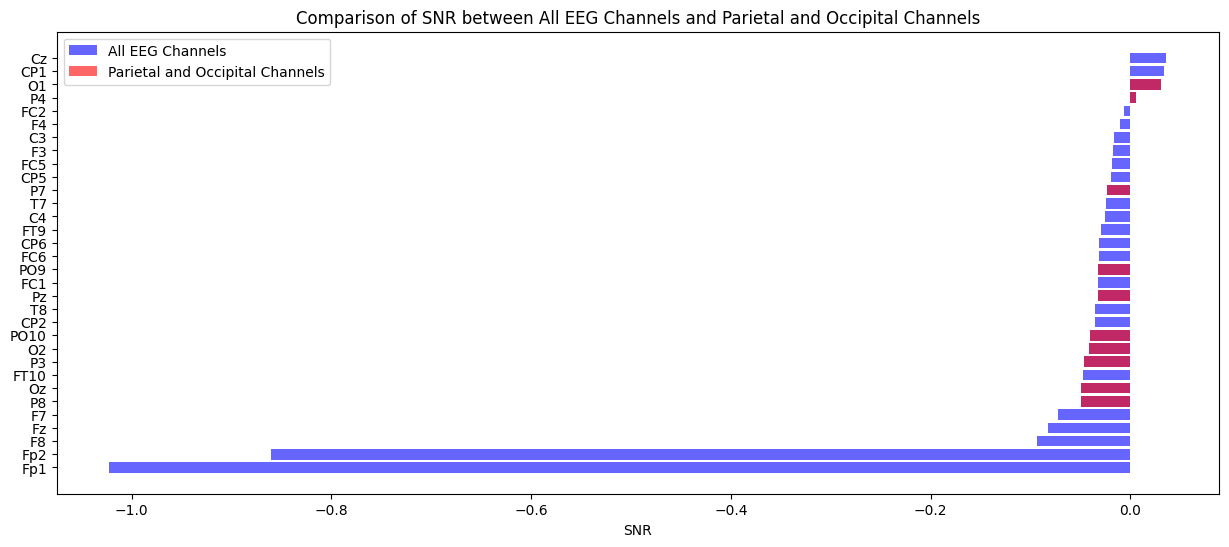

In [4]:
import matplotlib.pyplot as plt

# Function to create bar plots for comparison of mathematical characteristics
def plot_characteristics(characteristic, eeg_values, parietal_occipital_values, title):
    plt.figure(figsize=(15, 6))
    
    # Sort channels by eeg_values for better visualization
    sorted_channels = eeg_values.sort_values().index
    
    plt.barh(sorted_channels, eeg_values[sorted_channels], color='b', alpha=0.6, label='All EEG Channels')
    plt.barh(sorted_channels, parietal_occipital_values[sorted_channels], color='r', alpha=0.6, label='Parietal and Occipital Channels')
    
    plt.xlabel(characteristic)
    plt.title(f'Comparison of {characteristic} between All EEG Channels and Parietal and Occipital Channels')
    plt.legend()
    plt.show()

# Plot each characteristic
for characteristic in eeg_all_characteristics.keys():
    eeg_values = eeg_all_characteristics[characteristic].reindex(eeg_channels)
    parietal_occipital_values = parietal_occipital_all_characteristics[characteristic].reindex(eeg_channels)
    plot_characteristics(characteristic, eeg_values, parietal_occipital_values, f'Comparison of {characteristic}')


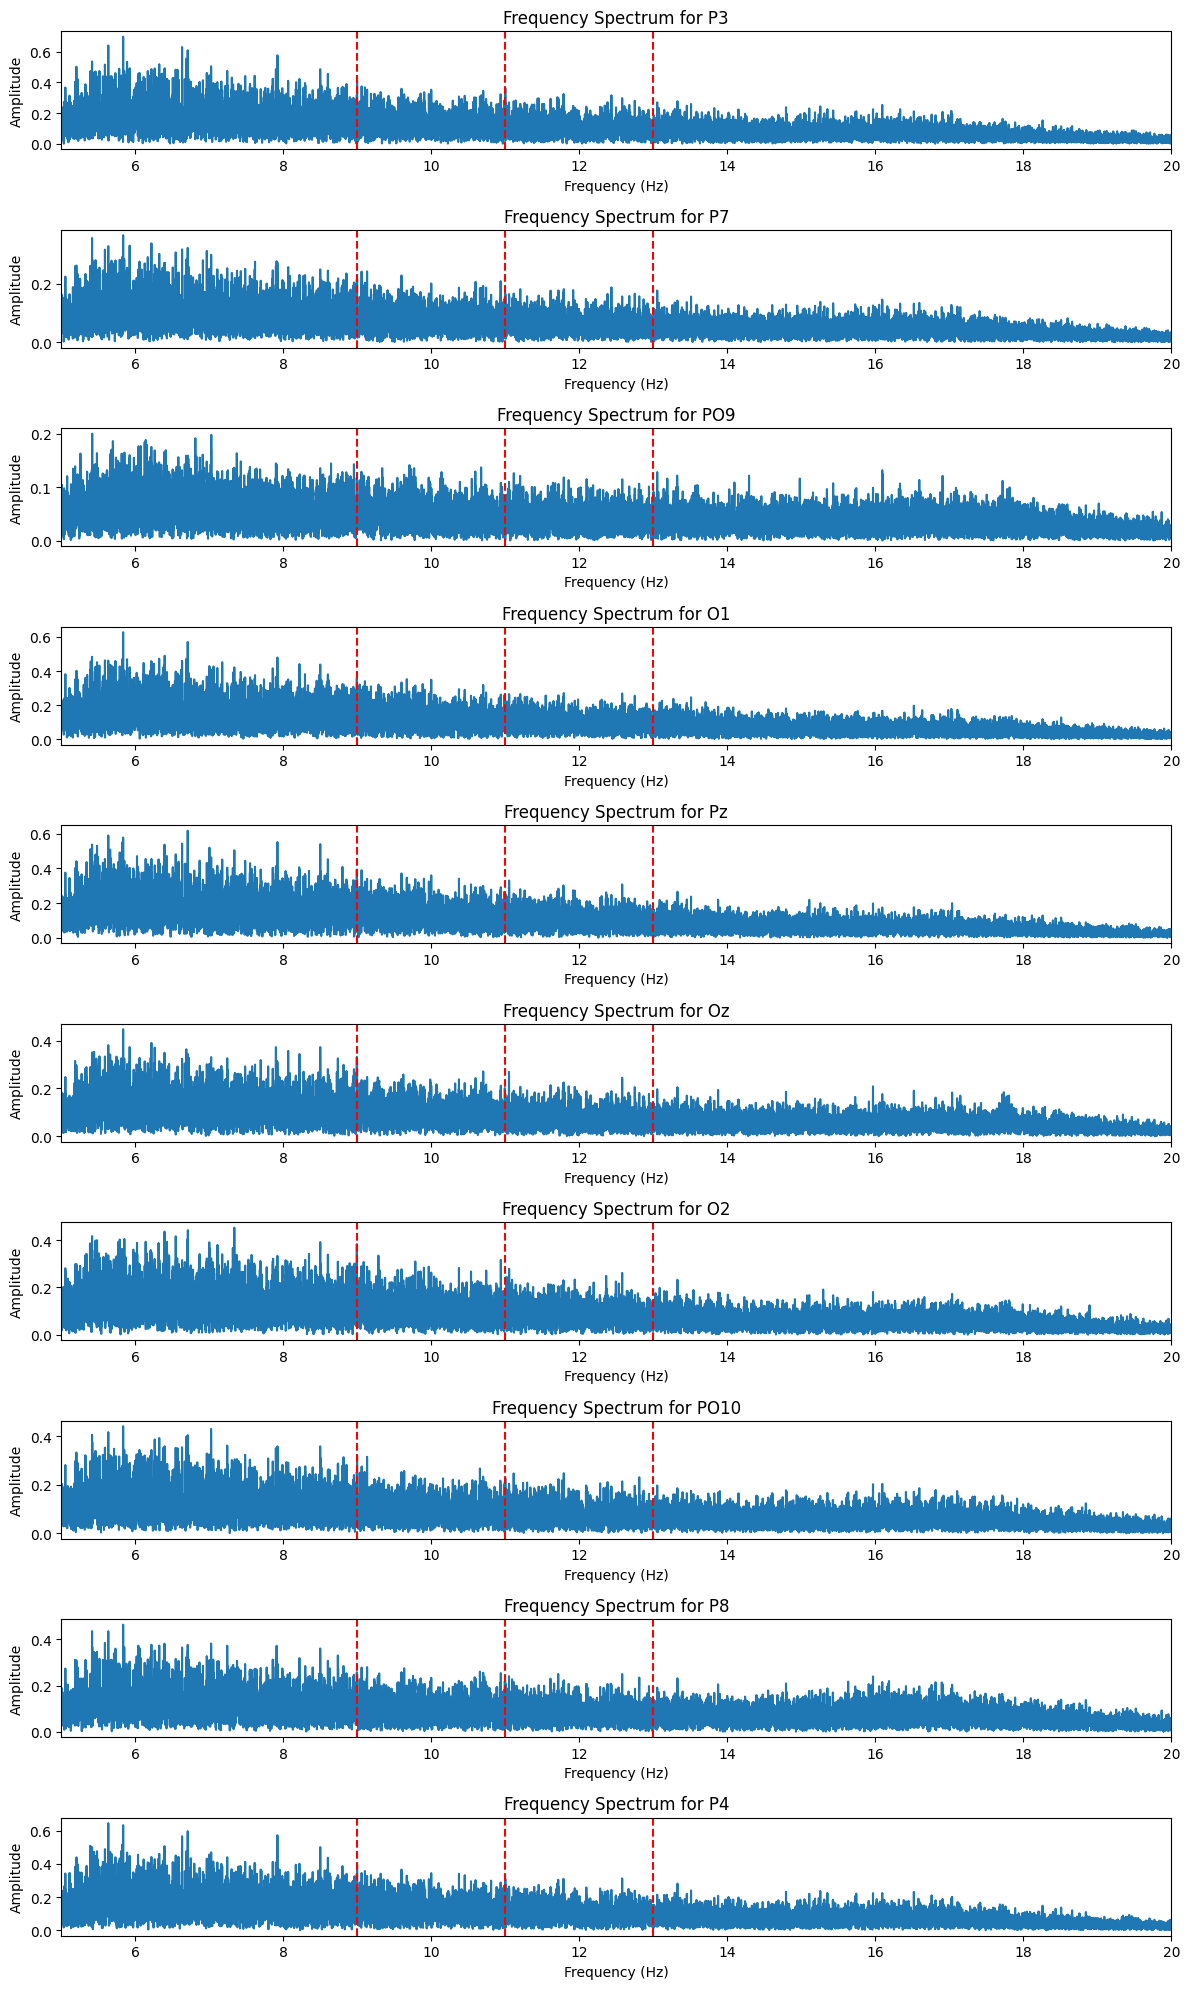

In [5]:
from scipy.signal import butter, filtfilt
from scipy.fftpack import fft, fftfreq
import numpy as np

# Function to apply Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Sampling frequency (assuming 256 Hz, common for EEG, but should be verified with actual data specs)
fs = 256

# Frequency range for bandpass filter
lowcut = 5.0  # Hz
highcut = 20.0  # Hz

# Stimulus frequencies
stimulus_frequencies = [9, 11, 13]

# Prepare to plot
n_plots = len(parietal_occipital_channels)
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2 * n_plots))

# Analyze each channel for SSVEP
for i, channel in enumerate(parietal_occipital_channels):
    # Apply bandpass filter
    filtered_data = butter_bandpass_filter(eeg_concatenated_df[channel], lowcut, highcut, fs, order=5)
    
    # Compute FFT
    yf = fft(filtered_data)
    xf = fftfreq(len(filtered_data), 1 / fs)[:len(filtered_data)//2]
    
    # Plot
    axes[i].plot(xf, 2.0/len(filtered_data) * np.abs(yf[:len(filtered_data)//2]))
    axes[i].set_title(f'Frequency Spectrum for {channel}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_xlim([5, 20])
    
    # Highlight the stimulus frequencies
    for freq in stimulus_frequencies:
        axes[i].axvline(x=freq, color='r', linestyle='--')
        
plt.tight_layout()
plt.show()
